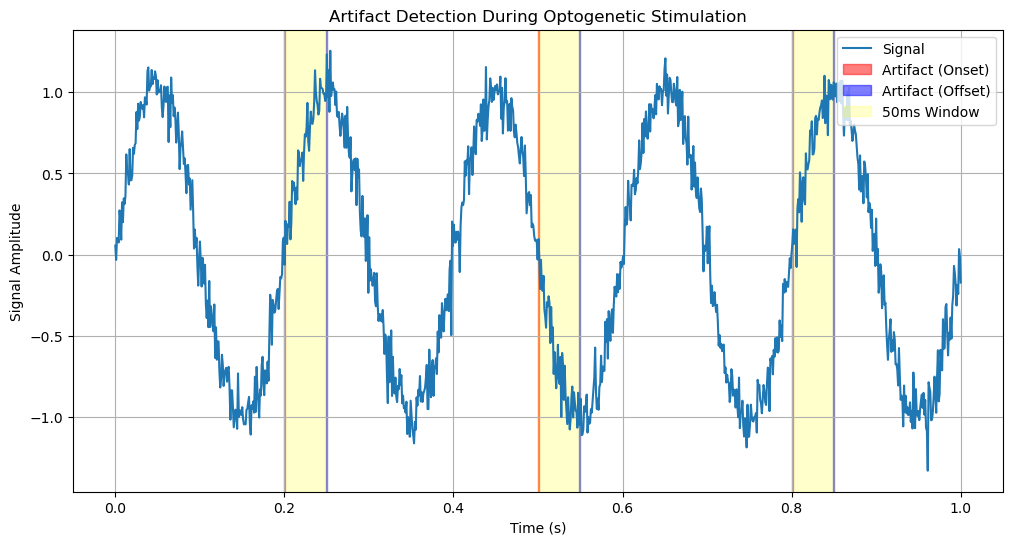

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
time = np.linspace(0, 1, 1000)  # 1 second sampled at 1000 Hz
signal = np.sin(2 * np.pi * 5 * time) + 0.1 * np.random.randn(len(time))  # Sample signal

# Optogenetic stimulation parameters
stim_start_times = [0.2, 0.5, 0.8]  # Stimulation start times (in seconds)
stim_duration = 0.05  # 50ms
sampling_rate = 1000  # Hz

# Create stimulation windows
stim_windows = [(start, start + stim_duration) for start in stim_start_times]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label='Signal')

# Highlight stimulation windows and artifacts
for start, end in stim_windows:
    plt.axvspan(start, start + 0.001, color='red', alpha=0.5, label='Artifact (Onset)')
    plt.axvspan(end - 0.001, end, color='blue', alpha=0.5, label='Artifact (Offset)')
    plt.axvspan(start, end, color='yellow', alpha=0.2, label='50ms Window')

# Labels and Legend
plt.title("Artifact Detection During Optogenetic Stimulation")
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.legend(["Signal", "Artifact (Onset)", "Artifact (Offset)", "50ms Window"], loc='upper right')
plt.grid()
plt.show()

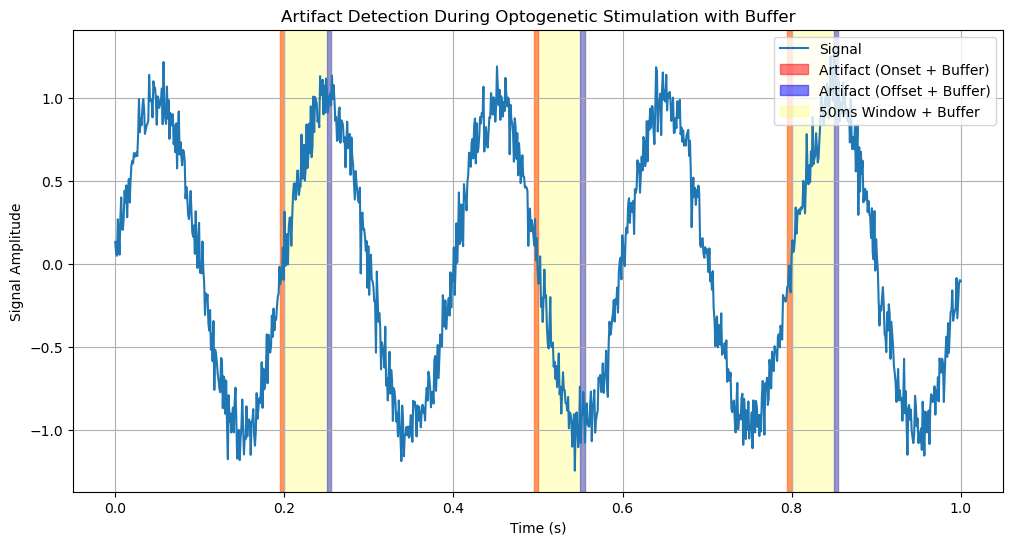

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
time = np.linspace(0, 1, 1000)  # 1 second sampled at 1000 Hz
signal = np.sin(2 * np.pi * 5 * time) + 0.1 * np.random.randn(len(time))  # Sample signal

# Optogenetic stimulation parameters
stim_start_times = [0.2, 0.5, 0.8]  # Stimulation start times (in seconds)
stim_duration = 0.05  # 50ms
buffer_duration = 0.005  # 5ms buffer
sampling_rate = 1000  # Hz

# Create stimulation windows
stim_windows = [(start, start + stim_duration) for start in stim_start_times]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label='Signal')

# Highlight stimulation windows and artifact regions
for start, end in stim_windows:
    # Onset/Offset detection with 5ms buffer
    plt.axvspan(start - buffer_duration, start, color='red', alpha=0.5, label='Artifact (Onset + Buffer)')
    plt.axvspan(end, end + buffer_duration, color='blue', alpha=0.5, label='Artifact (Offset + Buffer)')
    
    # Whole-duration artifact with 5ms buffer on each side
    plt.axvspan(start - buffer_duration, end + buffer_duration, color='yellow', alpha=0.2, label='50ms Window + Buffer')

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Labels and Title
plt.title("Artifact Detection During Optogenetic Stimulation with Buffer")
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.grid()
plt.show()

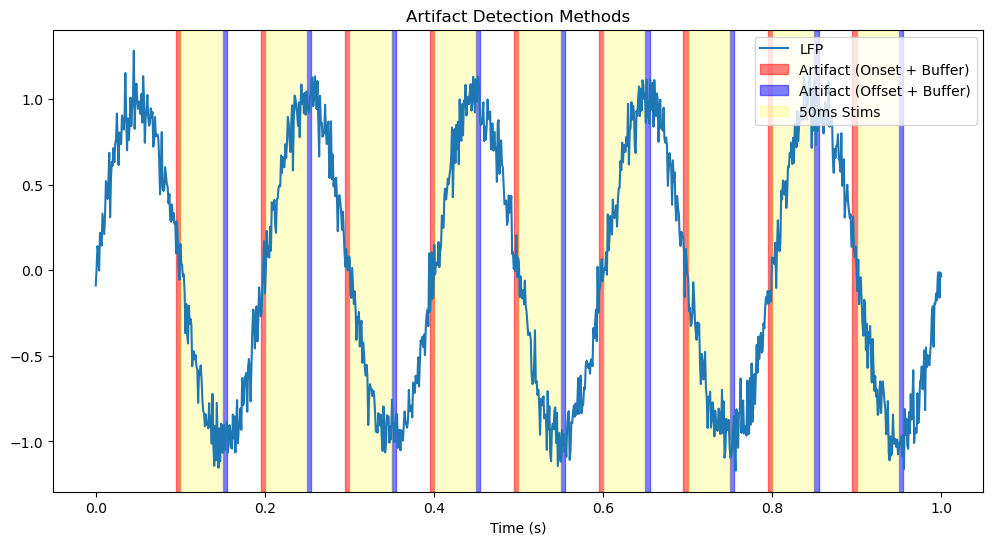

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
time = np.linspace(0, 1, 1000)  # 1 second sampled at 1000 Hz
signal = np.sin(2 * np.pi * 5 * time) + 0.1 * np.random.randn(len(time))  # Sample signal

# Optogenetic stimulation parameters
stim_frequency = 10  # Hz
stim_interval = 1 / stim_frequency  # Interval between stimulations (100ms)
stim_duration = 0.05  # 50ms
buffer_duration = 0.005  # 5ms buffer
stim_start_times = np.arange(0.1, 1, stim_interval)  # Stimulation starts at 10Hz (e.g., 0.1s, 0.2s, ...)

# Create stimulation windows
stim_windows = [(start, start + stim_duration) for start in stim_start_times]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label='LFP')

# Highlight stimulation windows and artifact regions
for start, end in stim_windows:
    # Onset/Offset detection with 5ms buffer
    #plt.axvspan(start - buffer_duration, start, color='red', alpha=0.5, label='Artifact (Onset + Buffer)')
    #plt.axvspan(end, end + buffer_duration, color='blue', alpha=0.5, label='Artifact (Offset + Buffer)')
    
    # Whole-duration artifact with 5ms buffer on each side
    plt.axvspan(start, end, color='yellow', alpha=0.2, label='50ms Stims')
    plt.axvspan(start - buffer, end + buffer, color='green', alpha=0.2, label='50ms Stims')

    # Add vertical lines for stim events (to indicate 10Hz frequency)
# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Labels and Title
plt.title("Artifact Detection Methods")
plt.xlabel("Time (s)")
plt.show()
